
# Study of One-class SVM with non-linear kernel (RBF)


In [223]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm
from sklearn.model_selection import train_test_split

In [224]:
# Generate data
X = 0.8 * np.random.randn(200, 2)
y = np.zeros(200) #normal data

# Generate some outlier data
X_outliers = 1.75*np.random.uniform(low=-4, high=4, size=(50, 2))


In [225]:
# Separate data between training and test:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [290]:
# fit the model
# For this, we use just the "normal data"
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.4)
clf.fit(X_train)

OneClassSVM(gamma=0.4, nu=0.1)

In [291]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size
print('Número de falsos positivos de treinamento: ' +  str(n_error_train))
print('Número de falsos positivos de teste: ' +  str(n_error_train))
print('Número de outliers não detectados: ' + str(n_error_outliers))


Número de falsos positivos de treinamento: 16
Número de falsos positivos de teste: 16
Número de outliers não detectados: 1


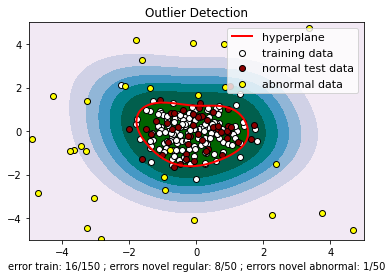

In [292]:
# Plot:
# --------------- Plot Contour -------------------

plt.title("Outlier Detection")
xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap="PuBuGn")
hypersphere = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='red')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='darkgreen')


# --------------- Plot Samples -------------------
normal_train = plt.scatter(X_train[:, 0], X_train[:, 1], c='white', edgecolors='k')
normal_test = plt.scatter(X_test[:, 0], X_test[:, 1], c='darkred', edgecolors='k')
outliers = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='yellow', edgecolors='k')

plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([hypersphere.collections[0], normal_train, normal_test, outliers],
           ["hyperplane", "training data",
            "normal test data", "abnormal data"],
           loc="upper right",
           prop=matplotlib.font_manager.FontProperties(size=11))
plt.xlabel(
    "error train: %d/150 ; errors novel regular: %d/50 ; "
    "errors novel abnormal: %d/50"
    % (n_error_train, n_error_test, n_error_outliers))
#plt.show()
plt.savefig('fix_nu01_gama04.png')